# The Singular Value Decomposition

<!-- https://bringatrailer.com/listing/1964-rolls-royce-james-young-phanton-v-limosine/ -->
<br>
<br>
<center>
    
<img src="images/rolls-royce.jpg" alt = "figure" width="650">
    
</center>

In [2]:
# for conversion to PDF use these settings
%matplotlib inline
# qr_setting = 'url'
# qrviz_setting = 'show'
#
# for lecture use notebook
#%matplotlib notebook
qr_setting = None
qrviz_setting = 'save'
#
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
reload(sl)
reload(ut);

Today we'll begin our study of the most useful decomposition in applied Linear Algebra.

Pretty exciting, eh?

>The Singular Value Decomposition is the __“Swiss Army Knife”__ and the __“Rolls Royce”__ of matrix decompositions.

-- Diane O'Leary

The singular value decomposition is a matrix factorization.  

Now, the first thing to know is that __EVERY__ matrix has a singular value decomposition.

## Maximizing $\Vert A\mathbf{x}\Vert$

The singular value decomposition (let's just call it SVD) is based on a very simple question:


Let's say you are given an arbitrary matrix $A$, which does not need to be square.

Here is the question:

Among all unit vectors, what is the vector $\mathbf{x}$ that maximizes $\Vert A\mathbf{x}\Vert$?

In other words, in which direction does $A$ create the largest output vector from a unit input?

To set the stage to answer this question, let's review a few facts.

You recall that the eigenvalues of a __square__ matrix $A$ measure the amount that $A$ "stretches or shrinks" certain special vectors (the eigenvectors).

For example, for a square $A$, if $A\mathbf{x} = \lambda\mathbf{x}$ and $\Vert \mathbf{x}\Vert = 1,$ then

$$\Vert A\mathbf{x}\Vert = \Vert\lambda\mathbf{x}\Vert = |\lambda|\,\Vert\mathbf{x}\Vert = |\lambda|.$$

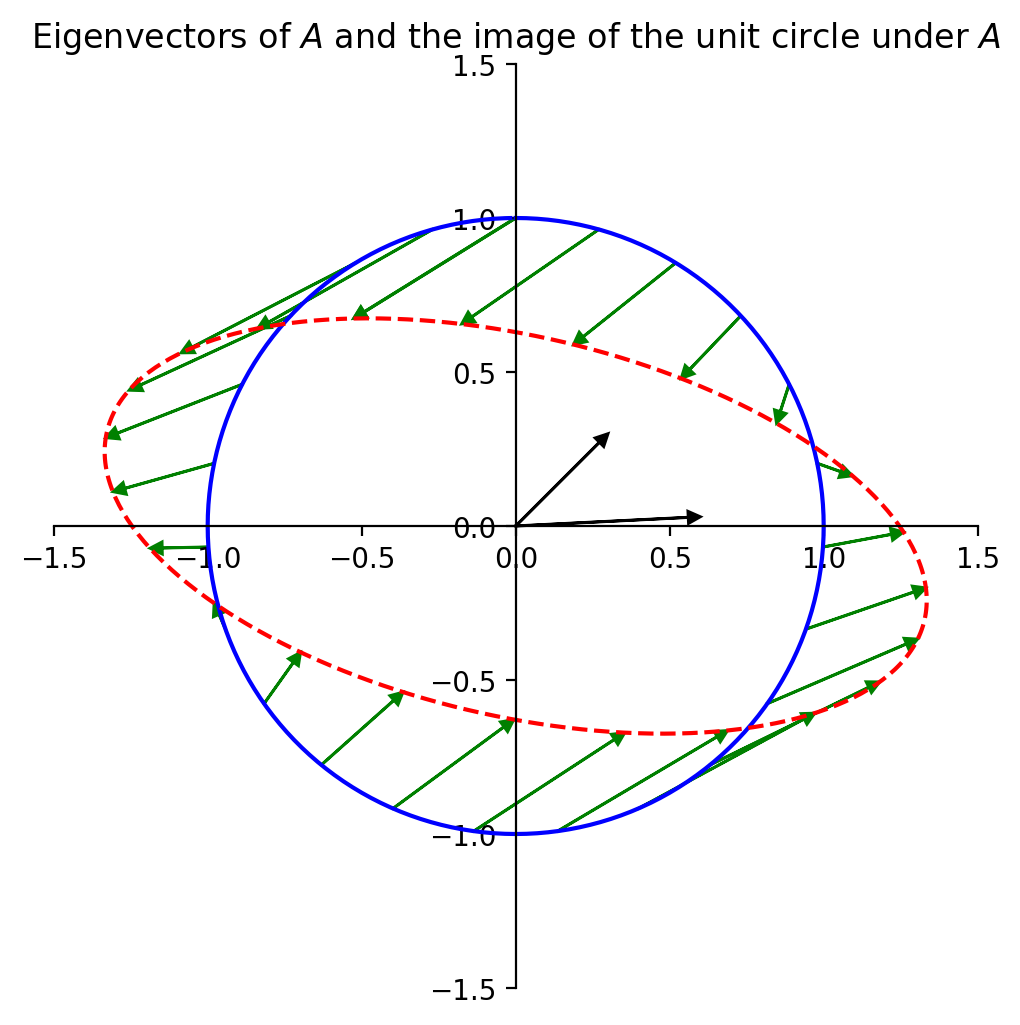

In [3]:
V = np.array([[2,1],[.1,1]])
L = np.array([[1.2,0],
              [0,0.7]])
A = V @ L @ np.linalg.inv(V)
#
ax = dm.plotSetup(-1.5,1.5,-1.5, 1.5, size=(9,6))
ut.centerAxes(ax)
theta = [2 * np.pi * f for f in np.array(range(360))/360.0]
x = [np.array([np.sin(t), np.cos(t)]) for t in theta]
Ax = [A.dot(xv) for xv in x]
ax.plot([xv[0] for xv in x],[xv[1] for xv in x],'-b')
ax.plot([Axv[0] for Axv in Ax],[Axv[1] for Axv in Ax],'--r')
theta_step = np.linspace(0, 2*np.pi, 24)
for th in theta_step:
    x = np.array([np.sin(th), np.cos(th)])
    ut.plotArrowVec(ax, A @ x, x, head_width=.04, head_length=.04, length_includes_head = True, color='g')
u, s, v = np.linalg.svd(A)
ut.plotArrowVec(ax, [0.3* V[0][0], 0.3*V[1][0]], head_width=.04, head_length=.04, length_includes_head = True, color='Black')
ut.plotArrowVec(ax, [0.3* V[0][1], 0.3*V[1][1]], head_width=.04, head_length=.04, length_includes_head = True, color='Black')
ax.set_title(r'Eigenvectors of $A$ and the image of the unit circle under $A$');

The __largest__ value of $\Vert A\mathbf{x}\Vert$ is the long axis of the ellipse.  Clearly there is some $\mathbf{x}$ that is mapped to that point by $A$.   That $\mathbf{x}$ is what we want to find.

And let's make clear that we can apply this idea to __arbitrary__ (non-square) matrices.

Here is an example that shows that we can still ask the question of what unit $\mathbf{x}$ maximizes $\Vert A\mathbf{x}\Vert$ even when $A$ is not square.

For example:

If $A = \begin{bmatrix}4&11&14\\8&7&-2\end{bmatrix},$ 

then the linear transformation $\mathbf{x} \mapsto A\mathbf{x}$ maps the unit sphere $\{\mathbf{x} : \Vert \mathbf{x} \Vert = 1\}$ in $\mathbb{R}^3$ onto an ellipse in $\mathbb{R}^2$, as shown here:

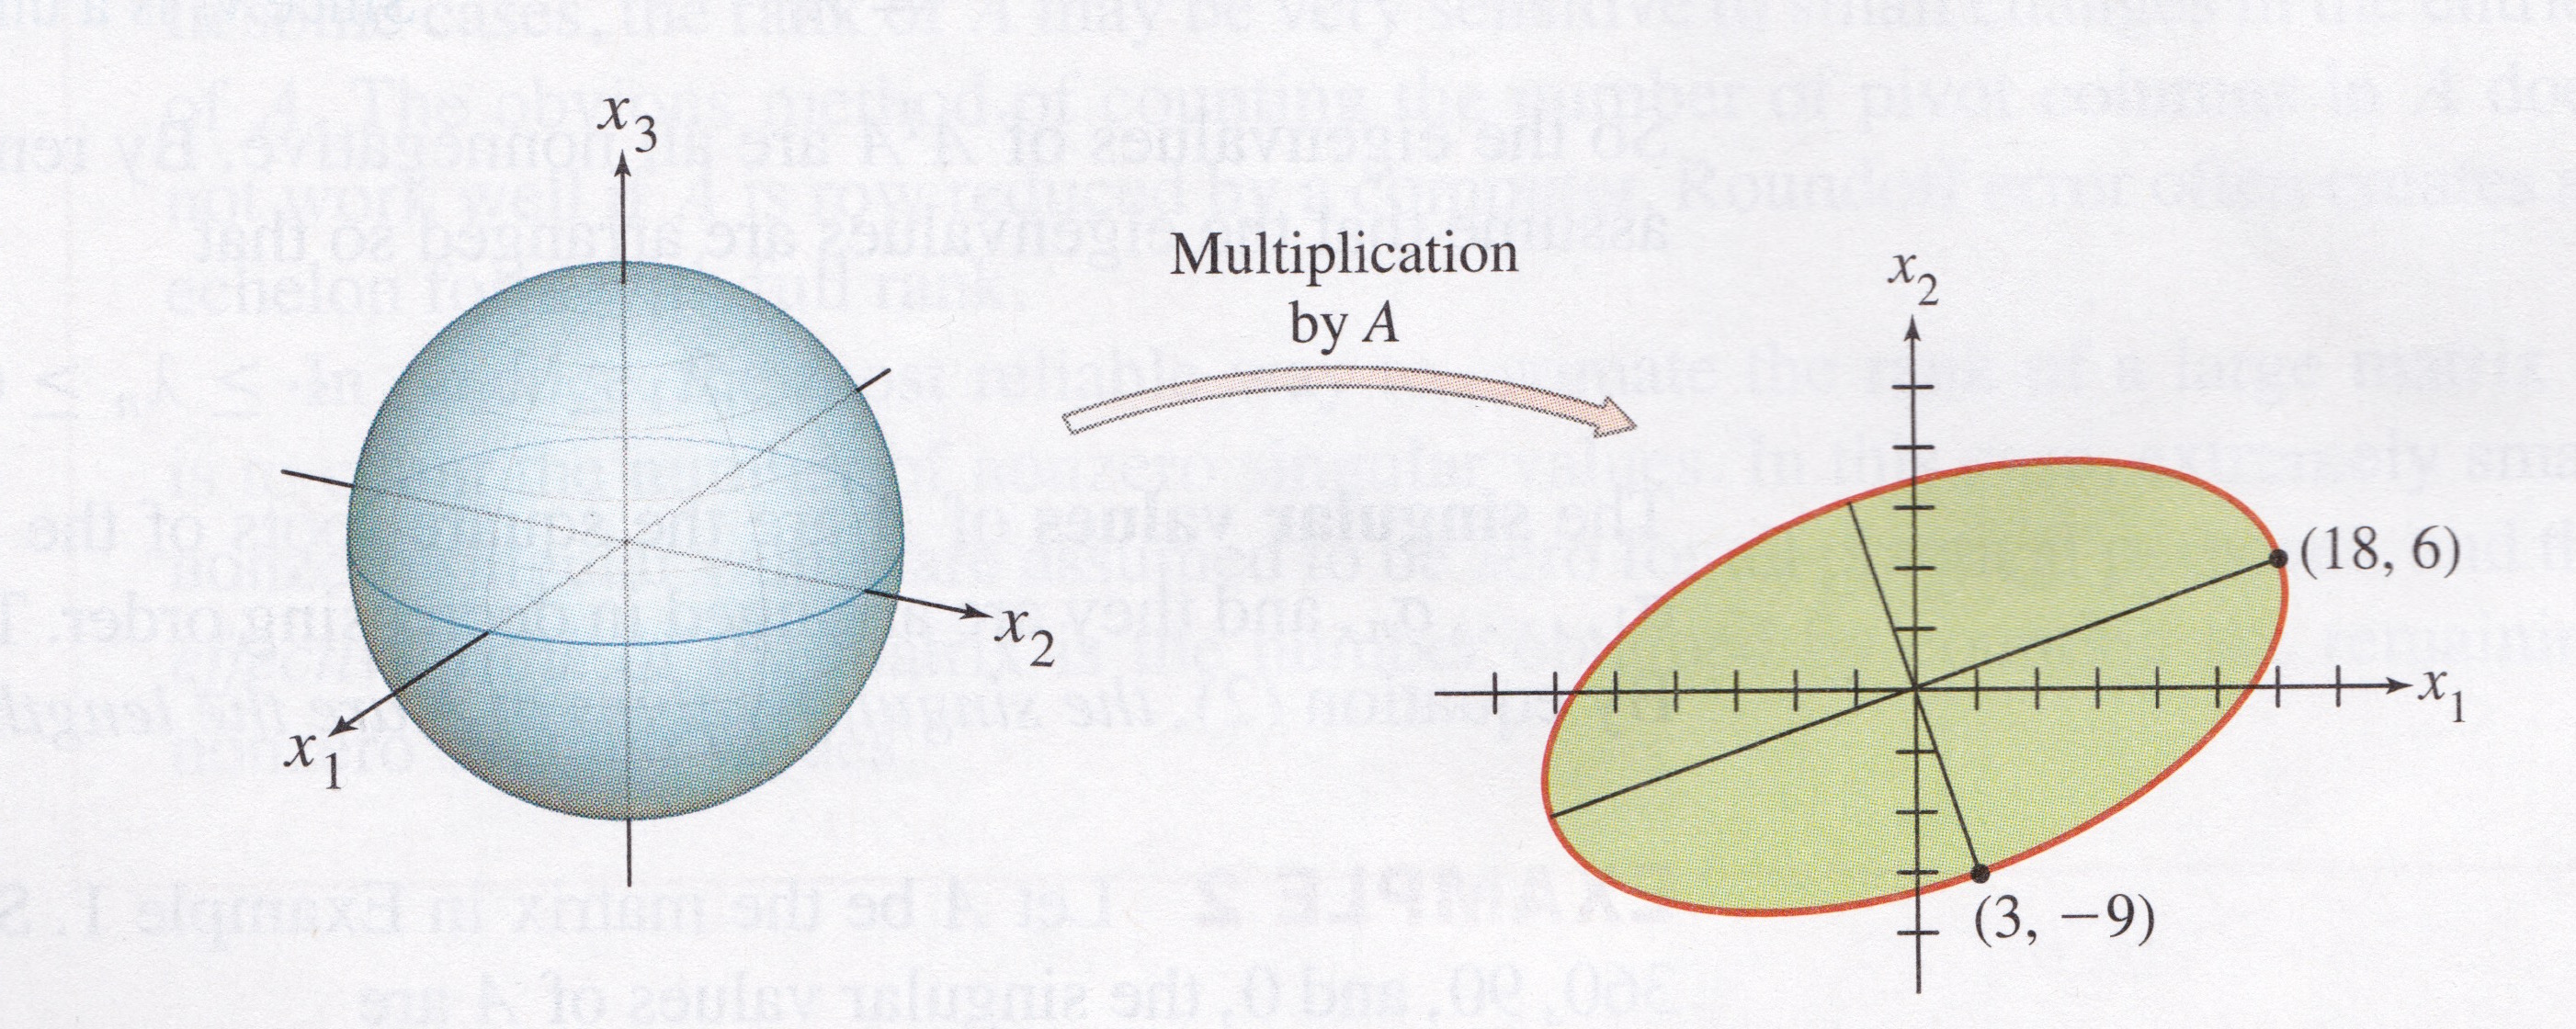

In [4]:
display(Image("images/Lay-fig-7-4-1.jpg", width=650))

### $\Vert A\mathbf{x}\Vert^2$ is a Quadratic Form

Now, here is a way to answer our question:

__Problem.__ Find the unit vector $\mathbf{x}$ at which the length $\Vert A\mathbf{x}\Vert$ is maximized, and compute this maximum length.

__Solution.__

The quantity $\Vert A\mathbf{x}\Vert^2$ is maximized at the same $\mathbf{x}$ that maximizes $\Vert A\mathbf{x}\Vert$, and $\Vert A\mathbf{x}\Vert^2$ is easier to study.

So let's ask to find the unit vector $\mathbf{x}$ at which $\Vert A\mathbf{x}\Vert^2$ is maximized.

Observe that

$$ \Vert A\mathbf{x}\Vert^2 = (A\mathbf{x})^T(A\mathbf{x}) $$

$$ = \mathbf{x}^TA^TA\mathbf{x} $$

$$ = \mathbf{x}^T(A^TA)\mathbf{x} $$

Now, $A^TA$ is a symmetric matrix.  

So we see that $\Vert A\mathbf{x}\Vert^2 = \mathbf{x}^TA^TA\mathbf{x}$ is a quadratic form!

... and we are seeking to maximize it subject to the constraint $\Vert \mathbf{x}\Vert = 1$.

As we learned in the last lecture, the maximum value of a quadratic form, subject to the constraint that $\Vert\mathbf{x}\Vert = 1$, is the largest eigenvalue of the symmetric matrix.

So the maximum value of $\Vert A\mathbf{x}\Vert^2$ subject to $\Vert\mathbf{x}\Vert = 1$ is $\lambda_1$, the largest eigenvalue of $A^TA$.

Also, the maximum is attained at a unit eigenvector of $A^TA$ corresponding to $\lambda_1$.

For the matrix $A$ in the 2 $\times$ 3 example,

$$A^TA = \begin{bmatrix}4&8\\11&7\\14&-2\end{bmatrix} \,\begin{bmatrix}4&11&14\\8&7&-2\end{bmatrix} = \begin{bmatrix}80&100&40\\100&170&140\\40&140&200\end{bmatrix}.$$

The eigenvalues of $A^TA$ are $\lambda_1 = 360, \lambda_2 = 90,$ and $\lambda_3 = 0.$   

The corresponding unit eigenvectors are, respectively, 

$$\mathbf{v}_1 = \begin{bmatrix}1/3\\2/3\\2/3\end{bmatrix}, \mathbf{v}_2 = \begin{bmatrix}-2/3\\-1/3\\2/3\end{bmatrix}, \mathbf{v}_3 = \begin{bmatrix}2/3\\-2/3\\1/3\end{bmatrix}.  $$

For $\Vert\mathbf{x}\Vert = 1$, the maximum value of $\Vert A\mathbf{x}\Vert$ is $\Vert A\mathbf{v}_1\Vert = \sqrt{360}.$

This example shows that the key to understanding the effect of $A$ on the unit sphere in $\mathbb{R}^3$ is to examime the quadratic form $\mathbf{x}^T(A^TA)\mathbf{x}.$  

We can also go back to our 2 $\times$ 2 example.

Let's plot the eigenvectors of $A^TA$.  

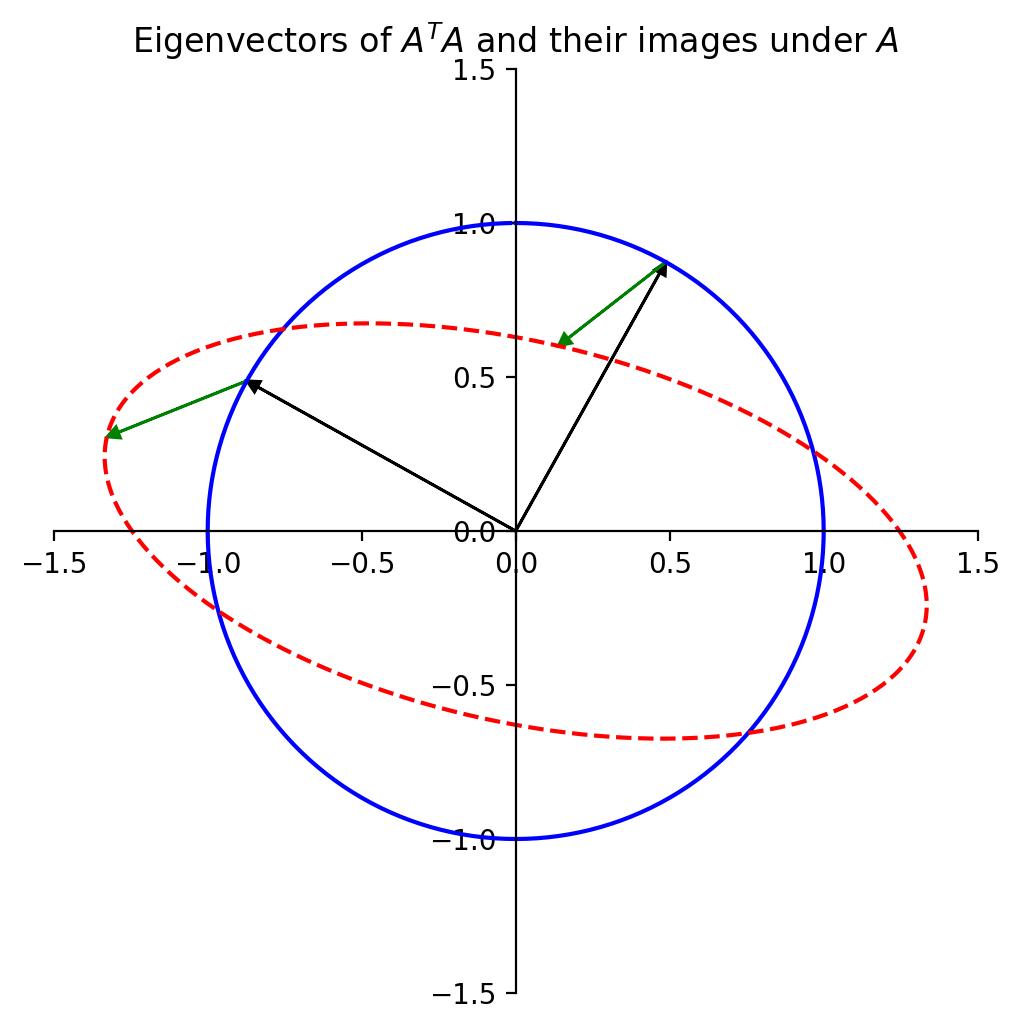

In [5]:
ax = dm.plotSetup(-1.5,1.5,-1.5, 1.5, size=(9,6))
ut.centerAxes(ax)
theta = [2 * np.pi * f for f in np.array(range(360))/360.0]
x = [np.array([np.sin(t), np.cos(t)]) for t in theta]
Ax = [A.dot(xv) for xv in x]
ax.plot([xv[0] for xv in x],[xv[1] for xv in x],'-b')
ax.plot([Axv[0] for Axv in Ax],[Axv[1] for Axv in Ax],'--r')
theta_step = np.linspace(0, 2*np.pi, 24)
#for th in theta_step:
#    x = np.array([np.sin(th), np.cos(th)])
#    ut.plotArrowVec(ax, A @ x, x, head_width=.04, head_length=.04, length_includes_head = True, color='g')
u, s, v = np.linalg.svd(A)
ut.plotArrowVec(ax, [v[0][0], v[1][0]], head_width=.04, head_length=.04, length_includes_head = True, color='Black')
ut.plotArrowVec(ax, [v[0][1], v[1][1]], head_width=.04, head_length=.04, length_includes_head = True, color='Black')
ut.plotArrowVec(ax, [s[0]*u[0][0], s[0]*u[1][0]], [v[0][0], v[1][0]], head_width=.04, head_length=.04, length_includes_head = True, color='g')
ut.plotArrowVec(ax, [s[1]*u[0][1], s[1]*u[1][1]], [v[0][1], v[1][1]], head_width=.04, head_length=.04, length_includes_head = True, color='g')
ax.set_title(r'Eigenvectors of $A^TA$ and their images under $A$');

We see that the eigenvector corresponding to the largest eigenvalue of $A^TA$ indeed shows us where $\Vert A\mathbf{x}\Vert$ is maximized -- where the ellipse is longest.

Also, the other eigenvector of $A^TA$ shows us where the ellipse is narrowest.

In fact, the entire geometric behavior of the transformation $\mathbf{x}\mapsto A\mathbf{x}$ is captured by the quadratic form $\mathbf{x}^TA^TA\mathbf{x}$.

## The Singular Values of a Matrix

Let's continue to consider $A$ to be an arbitrary $m\times n$ matrix. 

Notice that even though $A$ is not square in general, $A^TA$ is square and __symmetric.__

So, there is a lot we can say about $A^TA$.  

In particular, since $A^TA$ is symmetric, it can be __orthogonally diagonalized__ (as we saw in the last lecture).

So let $\{\mathbf{v}_1, \dots, \mathbf{v}_n\}$ be an orthonormal basis for $\mathbb{R}^n$ consisting of eigenvectors of $A^TA$, and let $\lambda_1, \dots, \lambda_n$ be the corresponding eigenvalues of $A^TA$.  

Then, for any eigenvector $\mathbf{v}_i$, 

$$ \Vert A\mathbf{v}_i\Vert^2 = (A\mathbf{v}_i)^T A\mathbf{v}_i = \mathbf{v}_i^T A^TA\mathbf{v}_i $$

$$ = \mathbf{v}_i^T(\lambda_i)\mathbf{v}_i $$
(since $\mathbf{v}_i$ is an eigenvector of $A^TA$)

$$ = \lambda_i$$
(since $\mathbf{v}_i$ is a unit vector.)

Now any expression $\Vert\cdot\Vert^2$ is nonnegative.

So the eigenvalues of $A^TA$ are all nonnegative.

That is: $A^TA$ is __positive semidefinite.__

We can therefore renumber the eigenvalues so that

$$\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_n \geq 0.$$

__Definition.__ The __singular values__ of $A$ are the square roots of the eigenvalues of $A^TA$.  They are denoted by $\sigma_1,\dots,\sigma_n,$ and they are arranged in decreasing order.

That is, $\sigma_i = \sqrt{\lambda_i}$ for $i = 1,\dots,n.$

By the above argument, __the singular values of $A$ are the lengths of the vectors $A\mathbf{v}_1, \dots, A\mathbf{v}_n.$__

### The Eigenvectors of $A^TA$ Lead To an Orthogonal Basis for $\operatorname{Col} A$

Now: we know that vectors $\mathbf{v}_1, \dots, \mathbf{v}_n$ are an orthogonal set because they are eigenvectors of the symmetric matrix $A^TA$.  

However, it's __also__ the case that $A\mathbf{v}_1, \dots, A\mathbf{v}_n$ are an orthogonal set.

<font color="blue">This fact is key to the SVD.</font>

It is not obvious at first that $A\mathbf{v}_1, \dots, A\mathbf{v}_n$ are an orthogonal set!

But it is true -- let's prove it (and a bit more).

__Theorem.__ Suppose $\{\mathbf{v}_1, \dots, \mathbf{v}_n\}$ is an orthonormal basis of $\mathbb{R}^n$ consisting of eigenvectors of $A^TA$, arranged so that the corresponding eigenvalues of $A^TA$ satisfy $\lambda_1 \geq \cdots \geq \lambda_n,$ and suppose $A$ has $r$ nonzero singular values.  

Then $\{A\mathbf{v}_1, \dots, A\mathbf{v}_r\}$ is an orthogonal basis for $\operatorname{Col}\ A,$ and rank $A = r$. 

Note how surprising this is: while $\{\mathbf{v}_1, \dots, \mathbf{v}_n\}$ are a basis for $\mathbb{R}^n$, $\operatorname{Col} A$ is a subspace of $\mathbb{R}^m$.

Nonetheless, 
* two eigenvectors $\mathbf{v}_i$ and $\mathbf{v}_j \in \mathbb{R}^n$ are orthogonal, and
* __their images__ $A\mathbf{v}_i$ and $A\mathbf{v}_j \in \mathbb{R}^m$ are also orthogonal.

__Proof.__   What we need to do is establish that $\{A\mathbf{v}_1, \dots, A\mathbf{v}_r\}$ is an orthogonal linearly independent set whose span is $\operatorname{Col}A$.


Because $\mathbf{v}_i$ and $\mathbf{v}_j$ are orthogonal for $i\neq j$,

$$ (A\mathbf{v}_i)^T(A\mathbf{v}_j) = \mathbf{v}_i^TA^TA\mathbf{v}_j = \mathbf{v}_i^T(\lambda_j \mathbf{v}_j) = 0.$$

So $\{A\mathbf{v}_1, \dots, A\mathbf{v}_n\}$ is an orthogonal set.

Furthermore, since the lengths of the vectors $A\mathbf{v}_1, \dots, A\mathbf{v}_n$ are the singular values of $A$, and since there are $r$ nonzero singular values, $A\mathbf{v}_i \neq {\mathbf 0}$ if and only if $1 \leq i \leq r.$

So $A\mathbf{v}_1, \dots, A\mathbf{v}_r$ are a __linearly independent__ set (because they are orthogonal and all nonzero), and clearly they are each in $\operatorname{Col}\ A$.

Finally, we just need to show that $\operatorname{Span}\{A\mathbf{v}_1, \dots, A\mathbf{v}_r\}$ = $\operatorname{Col} A$. 

To do this we'll show that for any $\mathbf{y}$ in $\operatorname{Col}\ A$, we can write $\mathbf{y}$ in terms of $\{A\mathbf{v}_1, \dots, A\mathbf{v}_r\}$:

Say $\mathbf{y} = A\mathbf{x}.$

Because $\{\mathbf{v}_1, \dots, \mathbf{v}_n\}$ is a basis for $\mathbb{R}^n$, we can write $\mathbf{x} = c_1\mathbf{v}_1 + \dots + c_n\mathbf{v}_n,$ so

$$\mathbf{y} = A\mathbf{x} = c_1A\mathbf{v}_1 + \dots + c_rA\mathbf{v}_r + \dots + c_nA\mathbf{v}_n.$$

$$ = c_1A\mathbf{v}_1 + \dots + c_rA\mathbf{v}_r. $$
(because $A\mathbf{v}_i = {\mathbf 0}$ for $i > r$).

In summary: $\{A\mathbf{v}_1, \dots, A\mathbf{v}_r\}$ is an (orthogonal) linearly independent set whose span is $\operatorname{Col} A$, so it is an (orthogonal) basis for $\operatorname{Col} A$.

Notice that we have also proved that $\operatorname{rank} A = \dim\operatorname{Col} A = r.$

In other words, if $A$ has $r$ nonzero singular values, $A$ has rank $r$.

## The Singular Value Decomposition

What we have just proved is that the eigenvectors of $A^TA$ are rather special.

Note that, thinking of $A$ as a linear operator:
* its domain is $\mathbb{R}^n$, and 
* its range is $\operatorname{Col} A.$

So we have just proved that 
* the set $\{\mathbf{v}_i\}$ is an orthogonal basis for the domain of $A$, for $i = 1,\dots, n$ and 
* the set $\{A\mathbf{v}_i\}$ is an orthogonal basis for the range of $A$, for $i = 1,\dots, r$.

Now we can define the SVD.

__Theorem.__ Let $A$ be an $m\times n$ matrix with rank $r$.  Then there exists an $m\times n$ matrix $\Sigma$ whose diagonal entries are the first $r$ singular values of $A$, $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r > 0,$ and there exists an $m\times m$ orthogonal matrix $U$ and an $n\times n$ orthogonal matrix $V$ such that 

$$ A = U\Sigma V^T $$

Any factorization $A = U\Sigma V^T,$ with $U$ and $V$ orthogonal and $\Sigma$ a diagonal matrix is called a __singular value decomposition (SVD)__ of $A$.  

The columns of $U$ are called the __left singular vectors__ and the columns of $V$ are called the __right singular vectors__ of $A$.

__Aside__: regarding the "Rolls Royce" property, consider how elegant this structure is.

In particular:

* $A$ is an arbitrary matrix
* $U$ and $V$ are both __orthogonal__ matrices
* $\Sigma$ is a __diagonal__ matrix
* all singular values are __positive or zero__
* there are as many __positive__ singular values as the rank of $A$
    * (not part of the theorem but we'll see it is true)


<!-- image credit: https://bringatrailer.com/listing/1964-rolls-royce-james-young-phanton-v-limosine/ -->

<center>

<img src="images/rolls-royce.jpg" alt="Figure" width="350px">
    
</center>

We have built up enough tools now that the proof is quite straightforward.

__Proof.__  Let $\lambda_i$ and $\mathbf{v}_i$ be the eigenvalues and eigenvectors of $A^TA$, and $\sigma_i = \sqrt{\lambda_i}$.

The starting point is to use the fact that we just proved:

$\{A\mathbf{v}_1, \dots, A\mathbf{v}_r\}$ is an orthogonal basis for $\operatorname{Col}\ A.$

Next, let us normalize each $A\mathbf{v}_i$ to obtain an orthonormal basis $\{\mathbf{u}_1,\dots,\mathbf{u}_r\}$, where

$$ \mathbf{u}_i = \frac{1}{\Vert A\mathbf{v}_i\Vert}A\mathbf{v}_i = \frac{1}{\sigma_i}A\mathbf{v}_i $$

Then

$$ A\mathbf{v}_i = \sigma_i\mathbf{u}_i\;\;\;\;(1 \leq i \leq r)$$

````{margin}
```{note}
If you have an orthogonal basis for a subspace, and you want to extend it to an orthogonal basis for 
the entire space, you can do it by a straightforward procedure called the _Gram-Schmidt process._  We
aren't covering it in this course, but that is what you would use here to extend the set 
$\{\mathbf{u}_{1} \dots \mathbf{u}_r\}$ to the set
$\{\mathbf{u}_{1} \dots \mathbf{u}_m\}$.
```
````

Now the rank of $A$ (which is $r$) may be less than $m$.   

In that case, add additional orthonormal vectors $\{\mathbf{u}_{r+1} \dots \mathbf{u}_m\}$ to the set so that they span $\mathbb{R}^m$.   

Now collect the vectors into matrices.   
    
$$ U = \begin{bmatrix}\mathbf{u}_1&\cdots&\mathbf{u}_m\end{bmatrix}$$

and

$$ V = \begin{bmatrix}\mathbf{v}_1&\cdots&\mathbf{v}_n\end{bmatrix}$$

Recall that these matrices are orthogonal because the $\{\mathbf{v_i}\}$ are orthogonal and the $\{A\mathbf{v_i}\}$  are orthogonal, as we previously proved.

So

$$ AV = [A\mathbf{v}_1\;\cdots\;A\mathbf{v}_r\;\overbrace{\mathbf{0}\cdots\mathbf{0}}^{n-r}]$$

$$ = [\sigma_1\mathbf{u}_1\;\cdots\;\sigma_r\mathbf{u}_r\;\overbrace{\mathbf{0}\;\cdots\;\mathbf{0}}^{n-r}] = U\Sigma. $$

(keeping in mind that $U$ is $m\times m$ and $\Sigma$ is $m\times n$.)

So 

$$ AV = U\Sigma$$

So:
    
$$AVV^T = U\Sigma V^T$$  

And because $V$ is an orthogonal matrix:

$$ A = U\Sigma V^T$$

## The Reduced SVD and the Pseudoinverse

Let's step back to get a sense of how the SVD decomposes a matrix.

Let's say $A$ is $m\times n$ with $m<n$.   

(The situation when $m>n$ follows similarly).

The SVD looks like this, with singular values on the diagonal of $\Sigma$:

<center>

<img src="images/L25-F1.png" alt="Figure" width="650px">
    
</center>

Now, let's assume that the number of nonzero singular values $r$ is less than $m$.   

Again, other cases would be similar.

<center>

<img src="images/L25-F2.png" alt="Figure" width="850px">
    
</center>

In many cases we are only concerned with representing $A$.   

That is, we don't need $U$ or $V$ to be orthogonal (square) matrices.

Then, to compute $A$, we only need the $r$ leftmost columns of $U$, and the $r$ upper rows of $V^T$.

That's because all the other values on the diagonal of $\Sigma$ are zero, so they don't contribute anything to $A$.

<center>

<img src="images/L25-F3.png" alt="Figure" width="850px">
    
</center>

So we often work with the __reduced SVD__ of $A$:

$m\left\{\begin{array}{c}\;\\\;\\\;\\\;\\\;\end{array}\right.\;\;\overbrace{\left[\begin{array}{cccc}\begin{array}{c}\vdots\\\vdots\\{\bf a_1}\\\vdots\\\vdots\end{array}&\begin{array}{c}\vdots\\\vdots\\{\bf a_2}\\\vdots\\\vdots\end{array}&\dots&\begin{array}{c}\vdots\\\vdots\\{\bf a_n}\\\vdots\\\vdots\end{array}\\\end{array}\right]}^{\Large n} =
\overbrace{\left[\begin{array}{ccc}\vdots&&\vdots\\\vdots&&\vdots\\\mathbf{u}_1&\cdots&\mathbf{u}_r\\\vdots&&\vdots\\\vdots&&\vdots\end{array}\right]}^{\large r}
\times
\left[\begin{array}{ccc}\sigma_1& &\\&\ddots&\\&&\sigma_r\end{array}\right]
\times
\left[\begin{array}{ccccc}\dots&\dots&\mathbf{v}_1&\dots&\dots\\&&\vdots&&\\\dots&\dots&\mathbf{v}_r&\dots&\dots\end{array}\right]$

$$\Large\overset{m\,\times\, n}{A^{\vphantom{T}}} = \overset{m\,\times\, r}{U^{\vphantom{T}}}\;\;\overset{r\,\times\, r}{\Sigma^{\vphantom{T}}}\;\;\overset{r\,\times\, n}{V^T}$$

Note that in the reduced SVD, $\Sigma$ has all nonzero entries on its diagonal, so it can be inverted.

However, we still have that $A = U\Sigma V^T$.

### The Pseudoinverse

Consider the case where we are working with the reduced SVD of $A$:
    
$$A = U\Sigma V^T.$$

In the reduced SVD, $\Sigma$ is invertible (it is a diagonal matrix with all positive entries on the diagonal).

Using this decomposition we can define an important matrix corresponding to $A$.

$$A^+ = V \Sigma^{-1} U^T$$

This matrix $A^+$ is called the __pseudoinverse__ of $A$.

(Sometimes called the Moore-Penrose pseudoinverse).

Obviously, $A$ cannot have an inverse, because it is not even square (let alone invertible) in general.

So why is $A^+$ called the pseudoinverse?

Let's go back to our favorite equation, $A\mathbf{x} = \mathbf{b}$, specifically in the case where there are no solutions.   

In that case, we can find least-squares solutions by finding $\mathbf{\hat{x}}$ such that $A\mathbf{\hat{x}}$ is the projection of $\mathbf{b}$ onto $\operatorname{Col}A$.

And, __if $A^TA$ is invertible,__ that $\mathbf{\hat{x}}$ is given by

$$ \mathbf{\hat{x}} = (A^TA)^{-1}A^T\mathbf{b}$$

But, what if $A^TA$ is not invertible?   

There are still least-square solutions, but now there are an infinite number.   

What if we just want to find __one__ of them?

We can do that using the pseudoinverse:

$$\mathbf{\hat{x}} = A^+ \mathbf{b}$$

Why does this work?  Let's see.

If we define $\mathbf{\hat{x}}$ this way, then what is $A\mathbf{\hat{x}}$?

$$A\mathbf{\hat{x}} = AA^+ \mathbf{b}$$


$$ = (U\Sigma V^T)(V\Sigma^{-1}U^T)\mathbf{b}$$

$$ = U\Sigma\Sigma^{-1}U^T\mathbf{b}$$

$$ = UU^T\mathbf{b}$$

Now, $U$ is an orthonormal basis for $\operatorname{Col}A$.

And, $U^T\mathbf{b}$ are the coefficients of the projection of $\mathbf{b}$ onto each column of $U$, since the columns are unit length.

So, $UU^T\mathbf{b}$ is the projection of $\mathbf{b}$ onto $\operatorname{Col}A$.

```{note}

To see why this is true, recall that when we project onto an orthogonal basis, the projection is especially easy.

Let's say that $\mathbf{u}_1$ and $\mathbf{u}_2$ form an orthogonal basis for some subspace.  Then the projection of $\mathbf{b}$ onto that subspace is very simple:

$$ \hat{\mathbf{b}} = \frac{\mathbf{u}_1^T\mathbf{b}}{\mathbf{u}_1^T\mathbf{u}_1}\mathbf{u}_1 + \frac{\mathbf{u}_2^T\mathbf{b}}{\mathbf{u}_2^T\mathbf{u}_2}\mathbf{u}_2. $$

Now, how does this become $UU^T\mathbf{b}$?   Say that  $\mathbf{u}_1$ and $\mathbf{u}_2$ are the columns of $U$.

$U$ is an orthonormal matrix, so $\mathbf{u}_1$ and $\mathbf{u}_2$ are unit vectors, so $\mathbf{u}_1^T\mathbf{u}_1 = 1$ and $\mathbf{u}_2^T\mathbf{u}_2 = 1$.

So 

$$ \hat{\mathbf{b}} = \mathbf{u}_1^T\mathbf{b}\mathbf{u}_1 + \mathbf{u}_2^T\mathbf{b}\mathbf{u}_2. $$

Note that $\mathbf{u}_1^T\mathbf{b}$ and $\mathbf{u}_2^T\mathbf{b}$ are scalar quantities, which we can collect into a vector, that can be expressed as $U^T\mathbf{b}$.

And multiplying that vector by $U$ gives us the projection above:

$$ \hat{\mathbf{b}} = \mathbf{u}_1^T\mathbf{b}\mathbf{u}_1 + \mathbf{u}_2^T\mathbf{b}\mathbf{u}_2  = UU^T\mathbf{b}. $$
 
```

So, $\mathbf{\hat{x}} = A^+ \mathbf{b}$ is a least squares solution of $A\mathbf{x} = \mathbf{b}$, 

because $A\mathbf{\hat{x}}$ is the projection of $\mathbf{b}$ onto the column space of $A$.

And this is true __even when $A^TA$ is not invertible__,

ie, this formula works for __any__ $A$.

Remember, any $A$ has an SVD, and so any $A$ has a pseudoinverse!

Using these facts, we can now think of the least squares solution set of $A\mathbf{x} = \mathbf{b}$ in a particularly simple way.

It is always the case for any least-squares solution $\mathbf{\hat{x}}$ that:
    
$$\mathbf{\hat{x}} = A^+ \mathbf{b} + \mathbf{z}$$

where $\mathbf{z}$ is __a vector in the nullspace of $A$__.

Hence we can write the set of all least-squares solutions in a particuarly clear way:
    
$$\{\hat{\mathbf{x}}\} = \{A^+ \mathbf{b} + \mathbf{z}\,|\,\mathbf{z} \in \operatorname{Nul} A\}.$$

When $A$ has dependent columns, then it has a nontrivial nullspace, and the above expression gives the infinite set of least-squares solutions.

When $A$ has independent columns, then its nullspace consists only of $\mathbf{0}$, and the above expression gives the unique least-squares solution.